<a href="https://colab.research.google.com/github/MJMortensonWarwick/AAMA/blob/main/1_2_genetic_algorithms_with_pygad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Genetic Algorithms with PyGAD
This tutorial, heavily inspired by the GARI repository, will use Genetic Algorithms (GA) to recreate a picture of our friend and hero Dr Vinh Doan.

To begin we will install the library:

In [17]:
!pip install pygad

Next, we will upload the image we want to recreate. The image ("vinh.jpg") is available on the [my.wbs](https://my.wbs.ac.uk/-/academic/318326/resources/in/1649576,1649572/item/1681937/#/) page for the module. Download the file to your machine and then click "Choose Files" to upload:

In [18]:
from google.colab import files
files.upload()

Saving vinh.jpg to vinh (1).jpg


{'vinh (1).jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xe1\x03\xcaExif\x00\x00II*\x00\x08\x00\x00\x00\x0b\x00\x0f\x01\x02\x00\x12\x00\x00\x00\x92\x00\x00\x00\x10\x01\x02\x00\x0c\x00\x00\x00\xa4\x00\x00\x00\x12\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\x1a\x01\x05\x00\x01\x00\x00\x00\xb0\x00\x00\x00\x1b\x01\x05\x00\x01\x00\x00\x00\xb8\x00\x00\x00(\x01\x03\x00\x01\x00\x00\x00\x02\x00\x00\x001\x01\x02\x00\r\x00\x00\x00\xc0\x00\x00\x002\x01\x02\x00\x14\x00\x00\x00\xce\x00\x00\x00;\x01\x02\x00\x0b\x00\x00\x00\xe2\x00\x00\x00\x98\x82\x02\x00/\x00\x00\x00\xee\x00\x00\x00i\x87\x04\x00\x01\x00\x00\x00\x1e\x01\x00\x00\x00\x00\x00\x00NIKON CORPORATION\x00NIKON Z 6_2\x00,\x01\x00\x00\x01\x00\x00\x00,\x01\x00\x00\x01\x00\x00\x00GIMP 2.10.36\x00\x002024:02:20 17:00:44\x00Jamie Gray\x00\x00Copyright Jamie Gray 2022  all rights reserved\x00\x00(\x00\x9a\x82\x05\x00\x01\x00\x00\x00\x04\x03\x00\x00\x9d\x82\x05\x00\x01\x00\x00\x00\x0c\x03\x00\x00"\x88\x03\x00\x01\x00\x00\

Next we will upload the file to our instance, and convert it to a numerical array:

In [19]:
import imageio
import numpy as np

image_im = imageio.imread('vinh.jpg')

# because images are a collection of pixels that have a value between
# 0 (for white) and 255 (full colour), we divided by 255 to return as
# a decimal value (e.g. 0 is white and 1 is full colour)
target_im = np.asarray(image_im/255, dtype=np.float32)

<ipython-input-19-9c9d03788305>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_im = imageio.imread('vinh.jpg')


Ignore the "DepreciationWarning". Let's print to screen to see what our target is:

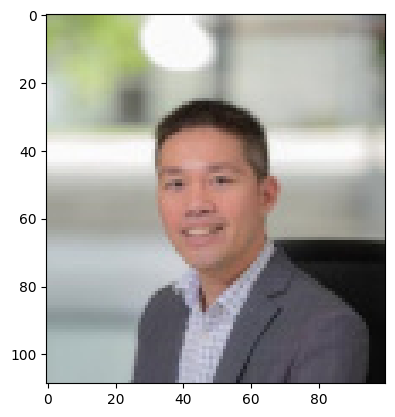

In [20]:
import matplotlib.pyplot as plt

plt.imshow(image_im)

Now we will specify a couple of functions to convert the image to a vector (i.e. from a 3d image to a 1d array of numbers) and back again. Do not worry about the code here, its quite domain specific and not super-transferable to other analytics workloads.

In [21]:
import functools
import operator

def img2chromosome(img_arr):
    """
    Represents the image as a 1D vector.

    img_arr: The image to be converted into a vector.

    Returns the vector.
    """

    return np.reshape(a=img_arr, newshape=(functools.reduce(operator.mul, img_arr.shape)))

def chromosome2img(vector, shape):
    """
    Converts a 1D vector into an array.

    vector: The vector to be converted into an array.
    shape: The shape of the target array.

    Returns the array.
    """

    # Check if the vector can be reshaped according to the specified shape.
    if len(vector) != functools.reduce(operator.mul, shape):
        raise ValueError(f"A vector of length {len(vector)} into an array of shape {shape}.")

    return np.reshape(a=vector, newshape=shape)

Next we need to specify our _fitness\_function_ for our GA model - i.e. the measure of success for our algorithm as we evaluate our progress:

In [22]:
# convert the image of Vinh to a vector using the above function
target_chromosome = img2chromosome(target_im)

# the fitness function
# take an proposed solution (model output) and the actual solution
# take the absolute value from subtracting one from the other
def fitness_fun(ga_instance, solution, solution_idx):
    # absolute as we don't want negative numbers
    fitness = np.sum(np.abs(target_chromosome - solution))

    # Negating the fitness value to make it increasing rather than decreasing
    # PyGAD expects that we increase fitness over time rather than decreasing
    fitness = np.sum(target_chromosome) - fitness
    return fitness

Next we need to specify our GA and its hyperparameters:

In [23]:
import pygad

# YOU NEED TO SPECIFY THE FOLLOWING!!
init_range_low = # insert the minimum value to start our chromosones
init_range_high = # insert the maximum value to start our chromosones
mutation_by_replacement = # True or False. Should we replace the values or add to them?
random_mutation_min_val= # insert the minimum value AFTER mutation
random_mutation_max_val= # insert the maximum value AFTER mutation

# specify the GA approach.
ga_instance = pygad.GA(fitness_func=fitness_fun,
                       num_generations=7000,
                       sol_per_pop=20,
                       num_parents_mating=10,
                       num_genes=target_im.size,
                       init_range_low=init_range_low, # needs to be specified
                       init_range_high=init_range_high, # needs to be specified
                       mutation_percent_genes=0.01,
                       mutation_type="random",
                       mutation_by_replacement=mutation_by_replacement, # needs to be specified
                       random_mutation_min_val=random_mutation_min_val, # needs to be specified
                       random_mutation_max_val=random_mutation_max_val) # needs to be specified

SyntaxError: invalid syntax (<ipython-input-23-58acffaf4b3d>, line 4)

Now we can run the model - may take ~10 minutes

In [ ]:
ga_instance.run()

Now our model has converged - let's display the results:

In [ ]:
ga_instance.plot_fitness()

We can see fitness progress in a fairly linear way. By generation 7,000 we have steadily improved. _N.B. we could/should have gone further but time is limited in a Lecture-Workshop_

Now let's look at some further results and our final generated image:

In [ ]:
# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(f"Fitness value of the best solution = {solution_fitness}")
print(f"Index of the best solution : {solution_idx}")

# print the generation that produced the best solution
if ga_instance.best_solution_generation != -1:
    print(f"Best fitness value reached after {ga_instance.best_solution_generation} generations.")

# convert solution to an image using the earlier function
result = chromosome2img(solution, target_im.shape)

# plot the solution photo to screen
plt.imshow(result)
plt.title("A Lovely Photo of Vinh")
plt.show()

Getting there - but not quite yet. If you want to try some more generations in your own time, e.g. 1,500+, then you may get something even better! 😺